In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
import numpy as np
plt.style.use('fivethirtyeight')
import time
from datetime import datetime 

In [2]:
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name

In [3]:
from nba_api.stats.endpoints.cumestatsplayergames import CumeStatsPlayerGames

In [4]:
from nba_api.stats.endpoints.leagueleaders import LeagueLeaders

In [5]:
from nba_api.stats.static.teams import get_teams
from nba_api.stats.static.players import get_active_players

# 2019-2020 League Leaders

In [6]:
ll_1 = LeagueLeaders(per_mode48='PerGame', stat_category_abbreviation='PTS', season='2019-20')
df_ll_1 = ll_1.get_data_frames()[0]
df_ll_1.head()
#Per game statistics
#I've taken a look at the league leaders of last season before draft

PLAYER_ID  RANK                 PLAYER TEAM  GP   MIN   FGM   FGA  FG_PCT  \
0     201935     1           James Harden  HOU  68  36.5   9.9  22.3   0.444   
1     203078     2           Bradley Beal  WAS  57  36.0  10.4  22.9   0.455   
2     203081     3         Damian Lillard  POR  66  37.5   9.5  20.4   0.463   
3    1629027     4             Trae Young  ATL  60  35.3   9.1  20.8   0.437   
4     203507     5  Giannis Antetokounmpo  MIL  63  30.4  10.9  19.7   0.553   

   FG3M  ...  FT_PCT  OREB  DREB   REB  AST  STL  BLK  TOV   PTS   EFF  
0   4.4  ...   0.865   1.0   5.5   6.6  7.5  1.8  0.9  4.5  34.3  32.6  
1   3.0  ...   0.842   0.9   3.3   4.2  6.1  1.2  0.4  3.4  30.5  25.4  
2   4.1  ...   0.888   0.5   3.8   4.3  8.0  1.1  0.3  2.9  30.0  28.9  
3   3.4  ...   0.860   0.5   3.7   4.3  9.3  1.1  0.1  4.8  29.6  26.6  
4   1.4  ...   0.633   2.2  11.4  13.6  5.6  1.0  1.0  3.7  29.5  34.6  

[5 rows x 24 columns]

In [7]:
df_ll_1['eFG%'] = (df_ll_1['FGM'] + 0.5 * df_ll_1['FG3M']) / df_ll_1['FGA']

In [8]:
df_ll_1['eFG%'] = df_ll_1['eFG%'].round(2)

In [9]:
df_ll_1 = df_ll_1.sort_values(by=['PTS', 'eFG%'], ascending=False)
#Sorted by PTS and eFG%

In [10]:
print('League Average 2019-20')
for cols in df_ll_1.select_dtypes(include=['int64', 'float64']).columns:
    print(f'{cols}: {df_ll_1[cols].mean():.2f}')

League Average 2019-20
PLAYER_ID: 928477.02
RANK: 130.99
GP: 61.93
MIN: 25.26
FGM: 4.37
FGA: 9.48
FG_PCT: 0.46
FG3M: 1.34
FG3A: 3.69
FG3_PCT: 0.34
FTM: 1.95
FTA: 2.50
FT_PCT: 0.77
OREB: 1.01
DREB: 3.61
REB: 4.62
AST: 2.63
STL: 0.80
BLK: 0.50
TOV: 1.47
PTS: 12.02
EFF: 13.43
eFG%: 0.53


# 2020-2021 League Leaders

In [11]:
ll = LeagueLeaders(per_mode48='PerGame', stat_category_abbreviation='PTS')
df_ll = ll.get_data_frames()[0]
df_ll.head()
#Per game statistics

PLAYER_ID  RANK                 PLAYER TEAM  GP   MIN   FGM   FGA  FG_PCT  \
0     203078     1           Bradley Beal  WAS  41  35.5  11.0  22.6   0.485   
1     203081     2         Damian Lillard  POR  47  35.9   9.1  20.4   0.448   
2     201939     3          Stephen Curry  GSW  42  33.8   9.7  20.4   0.476   
3     203507     4  Giannis Antetokounmpo  MIL  45  34.0  10.4  18.4   0.565   
4    1629029     5            Luka Doncic  DAL  43  35.0  10.2  20.8   0.488   

   FG3M  ...  FT_PCT  OREB  DREB   REB  AST  STL  BLK  TOV   PTS   EFF  
0   2.2  ...   0.902   1.1   3.9   5.0  4.8  1.2  0.4  3.3  31.3  26.9  
1   4.2  ...   0.936   0.5   3.7   4.3  7.7  1.0  0.3  3.2  29.6  27.9  
2   4.7  ...   0.926   0.5   4.9   5.5  6.0  1.3  0.1  3.1  29.4  28.1  
3   1.1  ...   0.687   1.8   9.6  11.4  6.2  1.1  1.3  3.8  28.8  33.9  
4   3.0  ...   0.731   0.7   7.4   8.1  8.8  1.0  0.6  4.3  28.6  30.2  

[5 rows x 24 columns]

In [12]:
df_ll.columns

Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'EFF'],
      dtype='object')

In [13]:
df_ll['eFG%'] = (df_ll['FGM'] + 0.5 * df_ll['FG3M']) / df_ll['FGA']

In [14]:
df_ll['eFG%'] = df_ll['eFG%'].round(2)

In [15]:
df_ll = df_ll.sort_values(by=['PTS', 'eFG%'], ascending=False)

In [16]:
print('League Average 2020-2021')
for cols in df_ll.select_dtypes(include=['int64', 'float64']).columns:
    print(f'{cols}: {df_ll[cols].mean():.2f}')

League Average 2020-2021
PLAYER_ID: 1041892.37
RANK: 126.49
GP: 43.10
MIN: 25.39
FGM: 4.40
FGA: 9.36
FG_PCT: 0.47
FG3M: 1.37
FG3A: 3.67
FG3_PCT: 0.34
FTM: 1.81
FTA: 2.31
FT_PCT: 0.78
OREB: 1.00
DREB: 3.59
REB: 4.59
AST: 2.67
STL: 0.80
BLK: 0.49
TOV: 1.41
PTS: 11.97
EFF: 13.65
eFG%: 0.55


# After draft

In [17]:
players_first = ['Damian Lillard', 'D\'Angelo Russell', 'Marcus Smart', 'Tobias Harris', 'Bam Adebayo', 'Al Horford', 
           'Jusuf Nurkic', 'Thomas Bryant', 'Dennis Schroder', 'Daniel Theis', 'Will Barton', 'Cam Reddish', 
           'Anthony Edwards']
#This is my team after draft

players = ['Damian Lillard', 'D\'Angelo Russell', 'Marcus Smart', 'Tobias Harris', 'Bam Adebayo', 'Jusuf Nurkic', 'Daniel Theis', 'Will Barton', 'Cam Reddish', 
           'Hamidou Diallo', 'Wayne Ellington', 'Jeff Green', 'Ivica Zubac', 'Delon Wright', 'Dillon Brooks']
#Anthony Edwards out, Bismack Biyombo in
#Thomas Bryant out due to injury
#Bismack Biyombo out
#Patrick Beverly in
#Hamidou Diallo in
#Dennis Schroder out
#Al Horford out
#Wayne Ellington in
#Jeff Green in
#Ivica Zubac in
#Delon Wright in
#Patrick Beverley out
#Dillon Brooks in
#Delon Wright out

df_ll_1['Fantasy_team'] = 'N'

for player in df_ll_1.loc[: ,'PLAYER']:
    if player in players:
        df_ll_1.loc[df_ll_1[df_ll_1['PLAYER'] == player].index, 'Fantasy_team'] = 'Y'

In [18]:
df_ll_1.loc[df_ll_1.Fantasy_team == 'Y'] #My players in 2019-20 season
#Where is Jusuf Nurkic and Thomas Bryant? Anthony Edwards has been drafted in 2020. 

PLAYER_ID  RANK            PLAYER TEAM  GP   MIN  FGM   FGA  FG_PCT  \
2       203081     3    Damian Lillard  POR  66  37.5  9.5  20.4   0.463   
15     1626156    16  D'Angelo Russell  MIN  45  32.3  8.0  18.8   0.426   
31      202699    32     Tobias Harris  PHI  72  34.3  7.7  16.3   0.471   
60     1628415    61     Dillon Brooks  MEM  73  28.9  6.0  14.6   0.407   
63     1628389    64       Bam Adebayo  MIA  72  33.6  6.1  11.0   0.557   
74      203115    75       Will Barton  DEN  58  33.0  5.7  12.7   0.450   
92      203935    93      Marcus Smart  BOS  60  32.0  4.3  11.4   0.375   
127    1629629   128       Cam Reddish  ATL  58  26.7  3.7   9.6   0.384   
155    1628464   156      Daniel Theis  BOS  65  24.1  3.7   6.6   0.566   
173    1627826   174       Ivica Zubac  LAC  72  18.4  3.3   5.3   0.613   
200    1626153   201      Delon Wright  DAL  73  21.5  2.6   5.6   0.462   

     FG3M  ...  DREB   REB  AST  STL  BLK  TOV   PTS   EFF  eFG%  Fantasy_team  
2     4.1  ...   3.8   4.3  8.0  1.1  0.3  2.9  30.0  28.9  0.57             Y  
15    3.5  ...   3.6   3.9  6.3  1.1  0.3  3.3  23.1  19.8  0.52             Y  
31    1.8  ...   5.9   6.9  3.2  0.7  0.6  1.4  19.6  20.3  0.53             Y  
60    2.0  ...   2.4   3.3  2.1  0.9  0.4  1.7  16.2  11.9  0.48             Y  
63    0.0  ...   7.8  10.2  5.1  1.1  1.3  2.8  15.9  24.3  0.55             Y  
74    1.9  ...   5.0   6.3  3.7  1.1  0.5  1.5  15.1  17.5  0.52             Y  
92    2.3  ...   3.1   3.8  4.9  1.7  0.5  1.7  12.9  14.5  0.48             Y  
127   1.4  ...   3.1   3.7  1.5  1.1  0.5  1.7  10.5   9.3  0.46             Y  
155   0.5  ...   4.4   6.6  1.7  0.6  1.3  0.8   9.2  15.3  0.60             Y  
173   0.0  ...   4.8   7.5  1.1  0.2  0.9  0.8   8.3  14.6  0.62             Y  
200   0.6  ...   2.9   3.8  3.3  1.2  0.3  1.0   6.9  11.2  0.52             Y  

[11 rows x 26 columns]

In [19]:
for player in df_ll.loc[: ,'PLAYER']:
    if player in players:
        df_ll.loc[df_ll[df_ll['PLAYER'] == player].index, 'Fantasy_team'] = 'Y'

In [20]:
df_ll_fant_team = df_ll.loc[df_ll.Fantasy_team == 'Y']
df_ll_fant_team #My players in 2020-21 season

PLAYER_ID  RANK           PLAYER TEAM  GP   MIN  FGM   FGA  FG_PCT  FG3M  \
1       203081     2   Damian Lillard  POR  47  35.9  9.1  20.4   0.448   4.2   
30      202699    31    Tobias Harris  PHI  45  33.4  8.1  15.4   0.525   1.4   
38     1628389    39      Bam Adebayo  MIA  44  33.6  7.2  12.8   0.562   0.0   
54     1628415    55    Dillon Brooks  MEM  44  29.0  6.0  15.0   0.403   1.8   
98      203115    99      Will Barton  DEN  46  31.1  4.7  10.9   0.429   1.7   
103    1628977   104   Hamidou Diallo  DET  36  23.8  4.5   9.2   0.492   0.5   
129     201961   130  Wayne Ellington  DET  36  22.8  3.5   7.8   0.448   2.6   
132    1626153   133     Delon Wright  SAC  41  28.3  3.7   7.9   0.463   0.9   
135     201145   136       Jeff Green  BKN  46  26.7  3.6   7.2   0.494   1.5   
151    1628464   152     Daniel Theis  CHI  46  24.2  3.7   6.7   0.547   0.8   
155    1627826   156      Ivica Zubac  LAC  51  21.7  3.4   5.3   0.638   0.0   

     ...  DREB  REB  AST  STL  BLK  TOV   PTS   EFF  eFG%  Fantasy_team  
1    ...   3.7  4.3  7.7  1.0  0.3  3.2  29.6  27.9  0.55             Y  
30   ...   6.3  7.3  3.6  0.9  0.8  1.9  20.8  23.8  0.57             Y  
38   ...   7.2  9.6  5.3  0.9  1.2  2.7  19.3  27.0  0.56             Y  
54   ...   2.1  3.0  2.4  1.3  0.4  1.9  16.1  11.7  0.46             Y  
98   ...   3.5  4.2  3.2  0.9  0.5  1.7  12.5  12.8  0.51             Y  
103  ...   4.1  5.2  2.3  0.9  0.4  1.5  12.2  13.5  0.52             Y  
129  ...   1.6  1.9  1.4  0.4  0.2  0.7  10.3   9.0  0.62             Y  
132  ...   3.4  4.4  4.7  1.5  0.5  1.2  10.2  15.4  0.53             Y  
135  ...   3.3  3.8  1.4  0.6  0.3  0.8  10.0  11.2  0.60             Y  
151  ...   3.9  5.1  1.6  0.6  1.0  1.0   9.2  13.0  0.61             Y  
155  ...   4.6  7.3  1.1  0.4  0.9  1.1   8.6  15.0  0.64             Y  

[11 rows x 26 columns]

In [21]:
from nba_api.stats.endpoints.cumestatsplayergames import CumeStatsPlayerGames

In [22]:
player_ids = list(df_ll_fant_team.PLAYER_ID)
game_ids = []

for ids in player_ids:
    df = CumeStatsPlayerGames(player_id=ids, league_id='00', season='2020-21', 
                                     season_type_all_star='Regular Season').get_data_frames()[0]
    game_ids.append(df)
game_ids = pd.concat(game_ids)
time.sleep(2)

In [23]:
game_ids.index = range(0,len(game_ids))

In [24]:
game_ids['MATCHUP_DATE'] = '-'
for i in range(0, len(game_ids.MATCHUP)):
    game_ids['MATCHUP_DATE'].iloc[i] = game_ids.MATCHUP.str.split(' ').iloc[i][0]

In [25]:
game_ids['MATCHUP_TEAM'] = '-'
for i in range(0, len(game_ids.MATCHUP)):
    game_ids['MATCHUP_TEAM'].iloc[i] = game_ids.MATCHUP.str.split(' ').iloc[i][1:]

In [26]:
for i in range(0, len(game_ids.MATCHUP_TEAM)):
    game_ids.MATCHUP_TEAM.iloc[i] = ' '.join(game_ids.MATCHUP_TEAM.iloc[i])

In [27]:
game_ids = game_ids.drop(labels='MATCHUP', axis=1)

In [28]:
game_ids['HOME_TEAM'] = '-'
for i in range(0, len(game_ids.MATCHUP_TEAM)):
    game_ids.HOME_TEAM.iloc[i] = game_ids.MATCHUP_TEAM.iloc[i].split('at')[1]

In [29]:
game_ids['AWAY_TEAM'] = '-'
for i in range(0, len(game_ids.MATCHUP_TEAM)):
    game_ids.AWAY_TEAM.iloc[i] = game_ids.MATCHUP_TEAM.iloc[i].split('at')[0]

In [30]:
game_ids = game_ids.drop('MATCHUP_TEAM', axis=1)
game_ids

GAME_ID MATCHUP_DATE       HOME_TEAM       AWAY_TEAM
0    0022000753   04/03/2021   Trail Blazers        Thunder 
1    0022000745   04/02/2021   Trail Blazers          Bucks 
2    0022000721   03/31/2021         Pistons  Trail Blazers 
3    0022000704   03/28/2021         Raptors  Trail Blazers 
4    0022000678   03/25/2021              He  Trail Blazers 
..          ...          ...             ...             ...
477  0022000061   12/30/2020        Clippers  Trail Blazers 
478  0022000054   12/29/2020        Clippers   Timberwolves 
479  0022000031   12/27/2020        Clippers      Mavericks 
480  0022000009   12/25/2020         Nuggets       Clippers 
481  0022000002   12/22/2020          Lakers       Clippers 

[482 rows x 4 columns]

In [31]:
game_ids.HOME_TEAM = game_ids.HOME_TEAM.str.replace(' ', '')

In [32]:
game_ids.AWAY_TEAM = game_ids.AWAY_TEAM.str.replace(' ', '')

In [33]:
game_ids.loc[game_ids.HOME_TEAM == 'He', 'HOME_TEAM'] = 'Heat'

In [34]:
game_ids[game_ids.HOME_TEAM == '']

GAME_ID MATCHUP_DATE HOME_TEAM AWAY_TEAM
82   0022000174   01/14/2021                  He
94   0022000722   03/31/2021                  He
95   0022000710   03/29/2021                  He
96   0022000686   03/26/2021                  He
101  0022000623   03/17/2021                  He
107  0022000475   02/22/2021                  He
108  0022000463   02/20/2021                  He
109  0022000447   02/18/2021                  He
110  0022000443   02/17/2021                  He
111  0022000425   02/15/2021                  He
112  0022000410   02/13/2021                  He
113  0022000392   02/11/2021                  He
115  0022000364   02/07/2021                  He
122  0022000260   01/25/2021                  He
123  0022000244   01/23/2021                  He
124  0022000234   01/22/2021                  He
125  0022000220   01/20/2021                  He
128  0022000136   01/09/2021                  He
131  0022000071   01/01/2021                  He
135  0022000012   12/23/2020                  He
146  0022000623   03/17/2021                  He
231  0022000475   02/22/2021                  He
366  0022000260   01/25/2021                  He
367  0022000244   01/23/2021                  He
453  0022000425   02/15/2021                  He

In [35]:
from nba_api.stats.endpoints.leaguegamelog import LeagueGameLog

In [36]:
lgl = LeagueGameLog()
time.sleep(2)

In [37]:
df_lgl = lgl.get_data_frames()[0]

In [38]:
df_lgl.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [39]:
df_lgl[df_lgl.GAME_ID == '0022000071']

SEASON_ID     TEAM_ID TEAM_ABBREVIATION         TEAM_NAME     GAME_ID  \
146     22020  1610612748               MIA        Miami Heat  0022000071   
147     22020  1610612742               DAL  Dallas Mavericks  0022000071   

      GAME_DATE      MATCHUP WL  MIN  FGM  ...  DREB  REB  AST  STL  BLK  TOV  \
146  2021-01-01    MIA @ DAL  L  240   29  ...    36   41   20   10    2   16   
147  2021-01-01  DAL vs. MIA  W  240   32  ...    45   49   18    9    3   17   

     PF  PTS  PLUS_MINUS  VIDEO_AVAILABLE  
146  24   83         -10                1  
147  25   93          10                1  

[2 rows x 29 columns]

In [40]:
game_ids.loc[game_ids.GAME_ID == '0022000071', 'HOME_TEAM'] = 'Mavericks'

In [41]:
df_lgl[df_lgl.GAME_ID == '0022000012']

SEASON_ID     TEAM_ID TEAM_ABBREVIATION      TEAM_NAME     GAME_ID  \
12     22020  1610612748               MIA     Miami Heat  0022000012   
13     22020  1610612753               ORL  Orlando Magic  0022000012   

     GAME_DATE      MATCHUP WL  MIN  FGM  ...  DREB  REB  AST  STL  BLK  TOV  \
12  2020-12-23    MIA @ ORL  L  240   42  ...    36   43   25   11    2   22   
13  2020-12-23  ORL vs. MIA  W  240   42  ...    30   41   23   15    3   18   

    PF  PTS  PLUS_MINUS  VIDEO_AVAILABLE  
12  21  107          -6                1  
13  19  113           6                1  

[2 rows x 29 columns]

In [42]:
game_ids.loc[game_ids.GAME_ID == '0022000012', 'HOME_TEAM'] = 'Magic'

In [43]:
game_ids.loc[game_ids.AWAY_TEAM == 'He', 'AWAY_TEAM'] = 'Heat'

In [44]:
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2

In [45]:
new_data = []
for i in list(game_ids.GAME_ID):
    df = BoxScoreTraditionalV2(game_id=i).get_data_frames()[0]
    new_data.append(df)
new_data = pd.concat(new_data)
time.sleep(2)

In [46]:
new_data.head()

GAME_ID     TEAM_ID TEAM_ABBREVIATION      TEAM_CITY  PLAYER_ID  \
0  0022000753  1610612760               OKC  Oklahoma City    1630197   
1  0022000753  1610612760               OKC  Oklahoma City    1629676   
2  0022000753  1610612760               OKC  Oklahoma City    1629650   
3  0022000753  1610612760               OKC  Oklahoma City    1629004   
4  0022000753  1610612760               OKC  Oklahoma City    1630177   

          PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  OREB  DREB  \
0  Aleksej Pokusevski              F          30:55  3.0  ...   0.0   2.0   
1         Isaiah Roby              F          23:15  2.0  ...   0.0   5.0   
2         Moses Brown              C          23:03  4.0  ...   6.0   8.0   
3      Svi Mykhailiuk              G          23:05  1.0  ...   0.0   2.0   
4        Theo Maledon              G          22:15  1.0  ...   0.0   2.0   

    REB  AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  
0   2.0  4.0  1.0  2.0  4.0  1.0   8.0       -42.0  
1   5.0  1.0  0.0  1.0  7.0  2.0   5.0       -50.0  
2  14.0  0.0  0.0  0.0  1.0  5.0  10.0       -39.0  
3   2.0  0.0  1.0  0.0  4.0  1.0   3.0       -43.0  
4   2.0  1.0  0.0  0.0  0.0  1.0   7.0       -46.0  

[5 rows x 28 columns]

In [47]:
df_inner_join = pd.merge(new_data, game_ids, on='GAME_ID', how='inner')

In [48]:
df_inner_join.head()

GAME_ID     TEAM_ID TEAM_ABBREVIATION      TEAM_CITY  PLAYER_ID  \
0  0022000753  1610612760               OKC  Oklahoma City    1630197   
1  0022000753  1610612760               OKC  Oklahoma City    1629676   
2  0022000753  1610612760               OKC  Oklahoma City    1629650   
3  0022000753  1610612760               OKC  Oklahoma City    1629004   
4  0022000753  1610612760               OKC  Oklahoma City    1630177   

          PLAYER_NAME START_POSITION COMMENT    MIN  FGM  ...  AST  STL  BLK  \
0  Aleksej Pokusevski              F          30:55  3.0  ...  4.0  1.0  2.0   
1         Isaiah Roby              F          23:15  2.0  ...  1.0  0.0  1.0   
2         Moses Brown              C          23:03  4.0  ...  0.0  0.0  0.0   
3      Svi Mykhailiuk              G          23:05  1.0  ...  0.0  1.0  0.0   
4        Theo Maledon              G          22:15  1.0  ...  1.0  0.0  0.0   

    TO   PF   PTS  PLUS_MINUS  MATCHUP_DATE     HOME_TEAM  AWAY_TEAM  
0  4.0  1.0   8.0       -42.0    04/03/2021  TrailBlazers    Thunder  
1  7.0  2.0   5.0       -50.0    04/03/2021  TrailBlazers    Thunder  
2  1.0  5.0  10.0       -39.0    04/03/2021  TrailBlazers    Thunder  
3  4.0  1.0   3.0       -43.0    04/03/2021  TrailBlazers    Thunder  
4  0.0  1.0   7.0       -46.0    04/03/2021  TrailBlazers    Thunder  

[5 rows x 31 columns]

In [49]:
df_inner_join = df_inner_join.drop_duplicates()
df_inner_join = df_inner_join.sort_values(by='MATCHUP_DATE', ascending=False)

In [50]:
df_inner_join['MATCHUP_DATE'] = pd.to_datetime(df_inner_join.MATCHUP_DATE)

In [51]:
df_inner_join = df_inner_join.sort_values(by='MATCHUP_DATE')

In [52]:
df_inner_join.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS',
       'MATCHUP_DATE', 'HOME_TEAM', 'AWAY_TEAM'],
      dtype='object')

In [53]:
df_inner_join_fant = df_inner_join[['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID','PLAYER_NAME', 
                                    'START_POSITION', 'COMMENT', 'MIN', 'FG_PCT', 'FT_PCT', 'FG3M', 'PTS', 'REB', 'AST', 
                                    'STL', 'BLK', 'TO', 'MATCHUP_DATE', 'HOME_TEAM', 'AWAY_TEAM']]
df_inner_join_fant
#Dataframe of my players' games.
#Parameters are the ones considered in fantasy game.
#'FG_PCT', 'FT_PCT', 'FG3M', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TO'

GAME_ID     TEAM_ID TEAM_ABBREVIATION    TEAM_CITY  PLAYER_ID  \
18063  0022000002  1610612746               LAC           LA     202331   
18084  0022000002  1610612747               LAL  Los Angeles    1629659   
18083  0022000002  1610612747               LAL  Los Angeles    1627936   
18082  0022000002  1610612747               LAL  Los Angeles     202693   
18081  0022000002  1610612747               LAL  Los Angeles    1628398   
...           ...         ...               ...          ...        ...   
1880   0022000758  1610612763               MEM      Memphis    1630217   
1882   0022000758  1610612763               MEM      Memphis    1630214   
1884   0022000758  1610612763               MEM      Memphis    1626145   
8317   0022000761  1610612743               DEN       Denver    1630192   
17119  0022000756  1610612746               LAC           LA     202694   

               PLAYER_NAME START_POSITION                 COMMENT    MIN  \
18063          Paul George              G                          35:46   
18084  Talen Horton-Tucker                                         10:51   
18083          Alex Caruso                                         16:40   
18082      Markieff Morris                                         19:00   
18081           Kyle Kuzma                                         26:38   
...                    ...            ...                     ...    ...   
1880          Desmond Bane                                         23:58   
1882        Xavier Tillman                                         20:43   
1884            Tyus Jones                                         17:54   
8317            Zeke Nnaji                 DNP - Coach's Decision   None   
17119    Marcus Morris Sr.              F                          28:28   

       FG_PCT  ...  FG3M   PTS  REB  AST  STL  BLK   TO  MATCHUP_DATE  \
18063   0.722  ...   5.0  33.0  6.0  3.0  1.0  0.0  5.0    2020-12-22   
18084   1.000  ...   0.0   6.0  1.0  0.0  1.0  0.0  1.0    2020-12-22   
18083   0.200  ...   1.0   3.0  2.0  1.0  0.0  0.0  3.0    2020-12-22   
18082   0.333  ...   1.0   5.0  4.0  1.0  0.0  0.0  0.0    2020-12-22   
18081   0.545  ...   1.0  15.0  1.0  0.0  0.0  0.0  2.0    2020-12-22   
...       ...  ...   ...   ...  ...  ...  ...  ...  ...           ...   
1880    0.455  ...   3.0  14.0  6.0  1.0  0.0  0.0  0.0    2021-04-04   
1882    0.333  ...   0.0   2.0  3.0  1.0  1.0  2.0  0.0    2021-04-04   
1884    0.333  ...   1.0   5.0  2.0  5.0  0.0  0.0  1.0    2021-04-04   
8317      NaN  ...   NaN   NaN  NaN  NaN  NaN  NaN  NaN    2021-04-04   
17119   0.692  ...   4.0  22.0  7.0  0.0  0.0  0.0  2.0    2021-04-04   

      HOME_TEAM  AWAY_TEAM  
18063    Lakers   Clippers  
18084    Lakers   Clippers  
18083    Lakers   Clippers  
18082    Lakers   Clippers  
18081    Lakers   Clippers  
...         ...        ...  
1880      76ers  Grizzlies  
1882      76ers  Grizzlies  
1884      76ers  Grizzlies  
8317    Nuggets      Magic  
17119  Clippers     Lakers  

[10632 rows x 21 columns]

In [54]:
df_inner_join_fant.index = range(0, len(df_inner_join_fant))

Damian Lillard


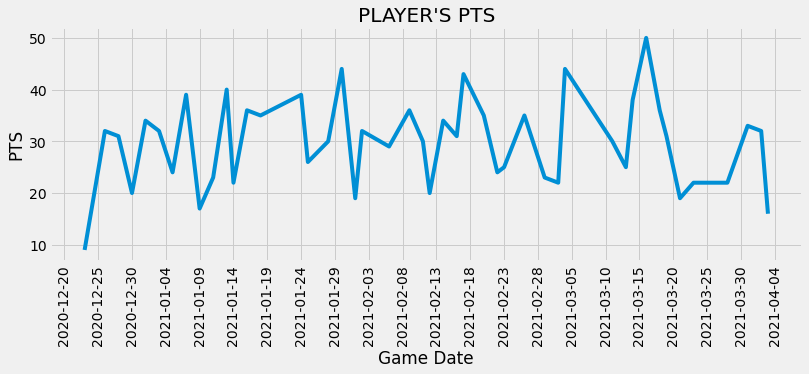

D'Angelo Russell


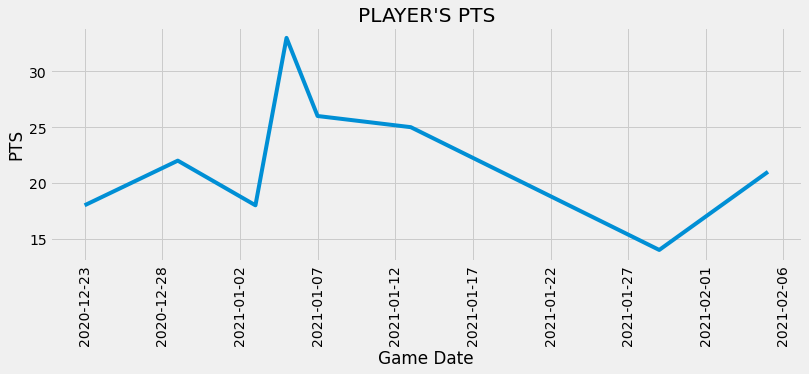

Marcus Smart


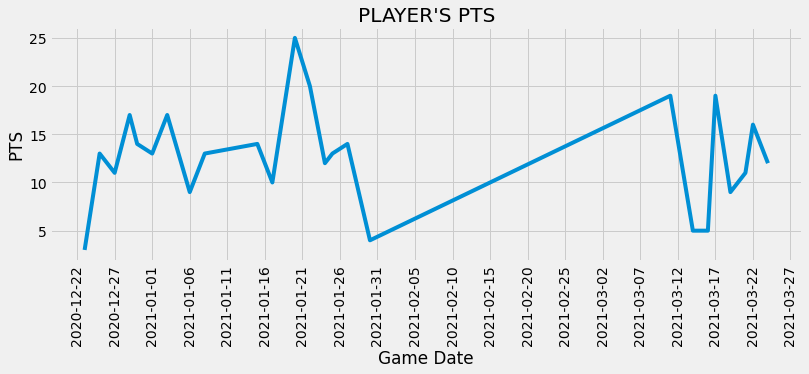

Tobias Harris


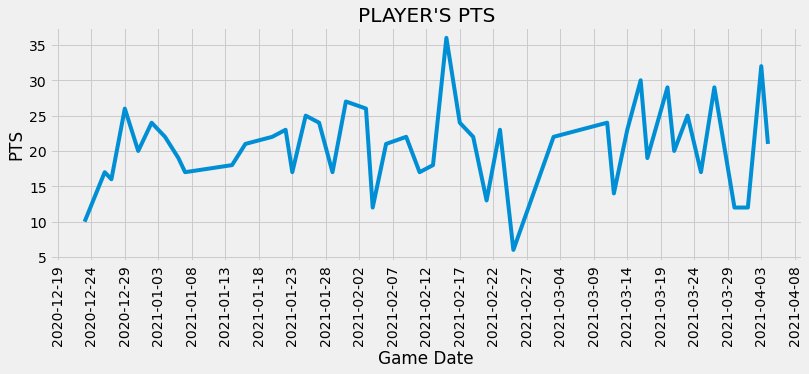

Bam Adebayo


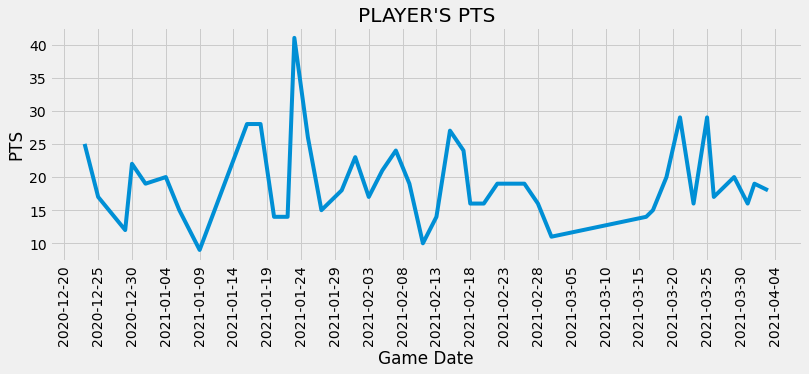

Jusuf Nurkic


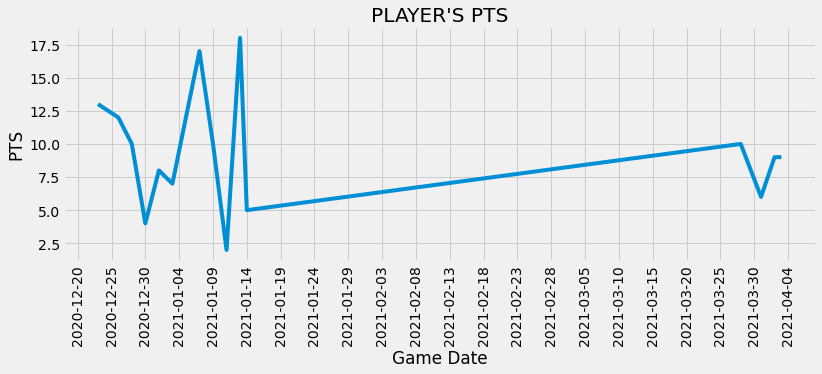

Daniel Theis


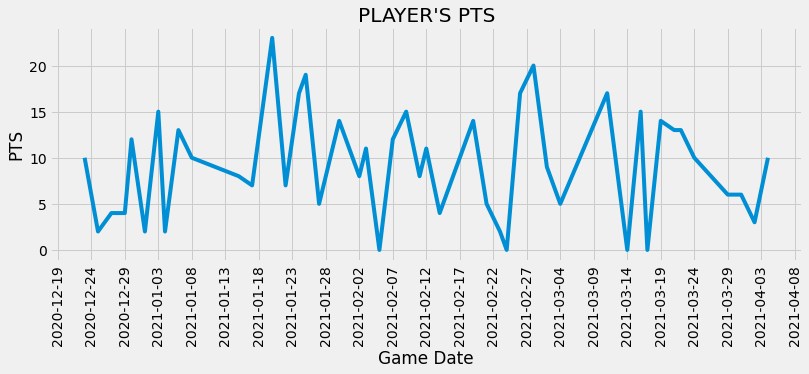

Will Barton


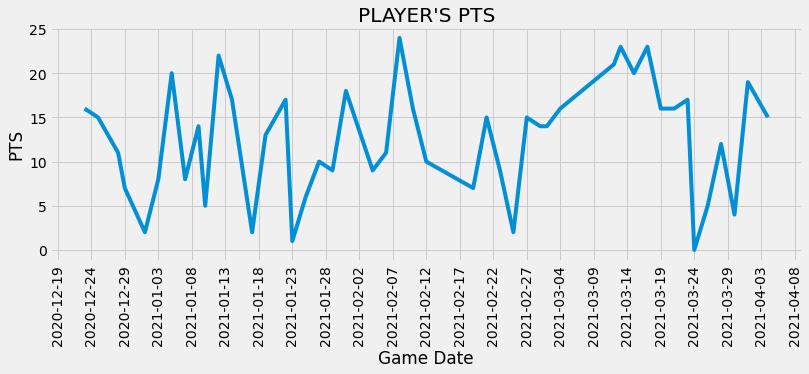

Cam Reddish


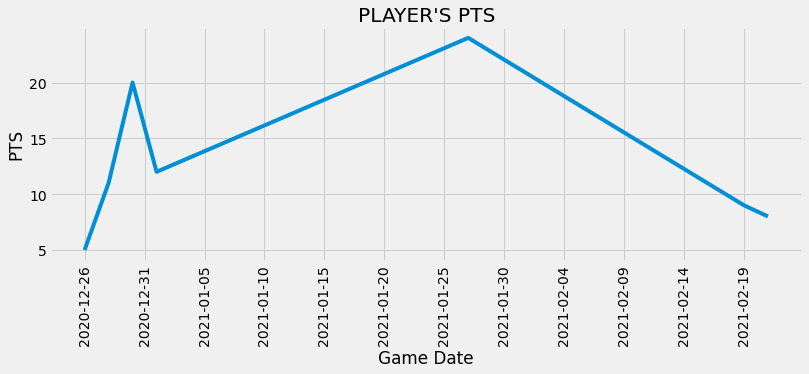

Hamidou Diallo


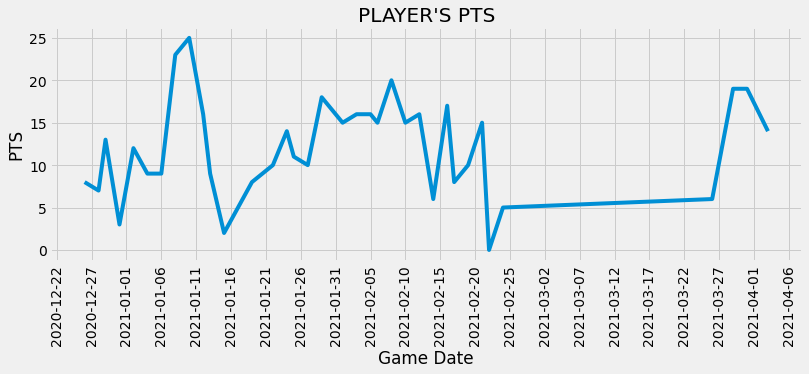

Wayne Ellington


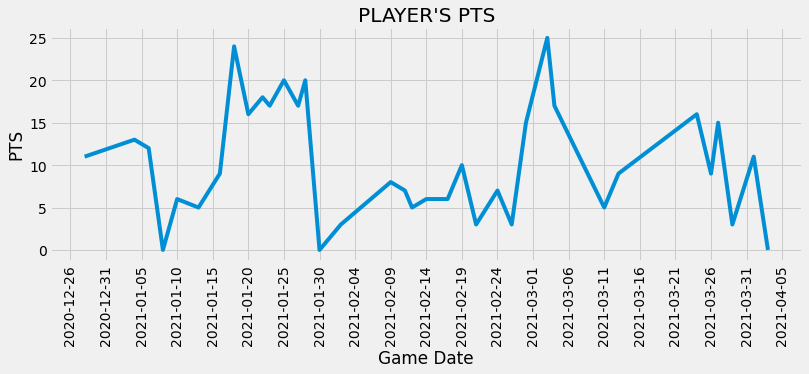

Jeff Green


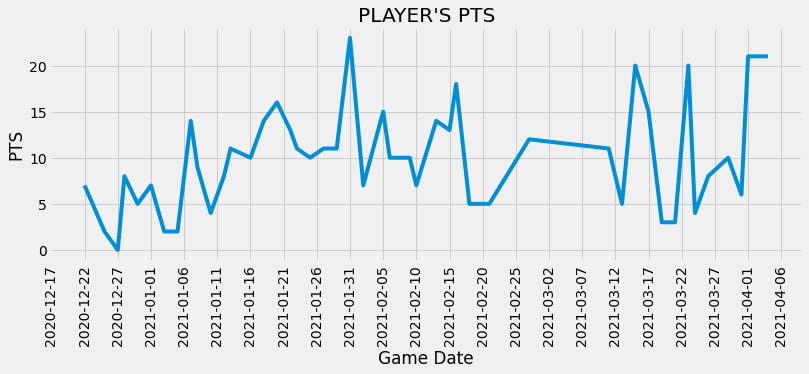

Ivica Zubac


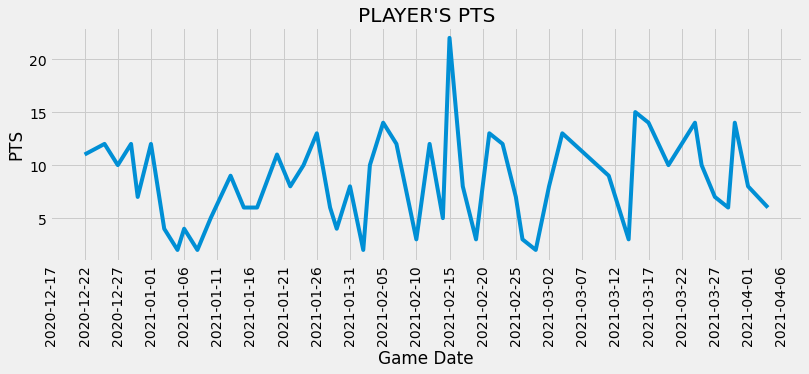

Delon Wright


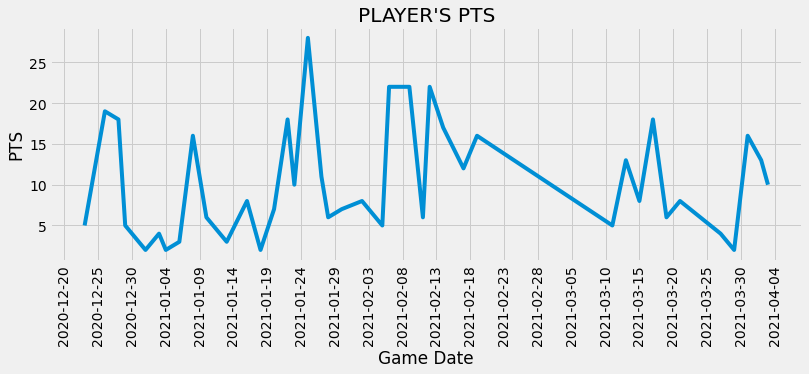

Dillon Brooks


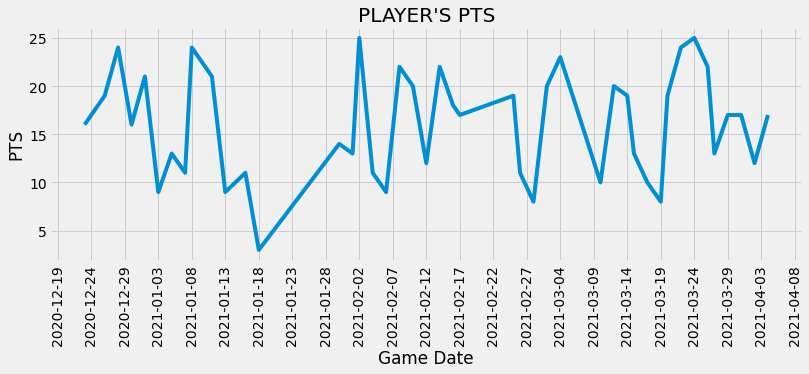

In [55]:
import matplotlib.dates as mdates
for i in players:
    print(i)
    plt.figure(figsize=(12,4))
    ax = sns.lineplot(x='MATCHUP_DATE', y='PTS', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    plt.title('PLAYER\'S PTS')
    plt.xlabel('Game Date')
    plt.ylabel('PTS')
    plt.xticks(rotation=90)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    plt.show()
#PTS trend of my players

Damian Lillard


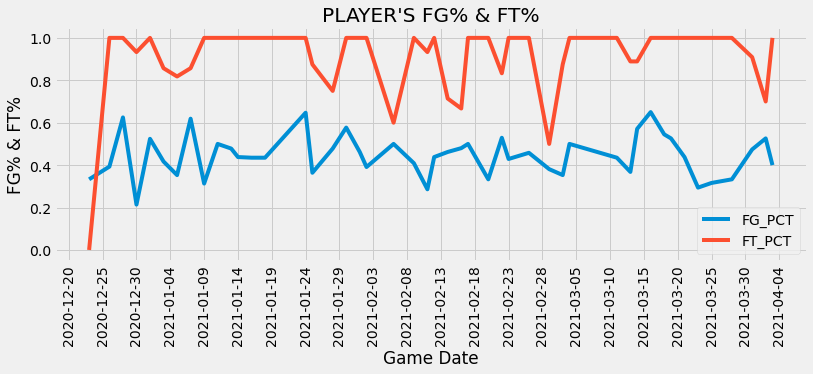

D'Angelo Russell


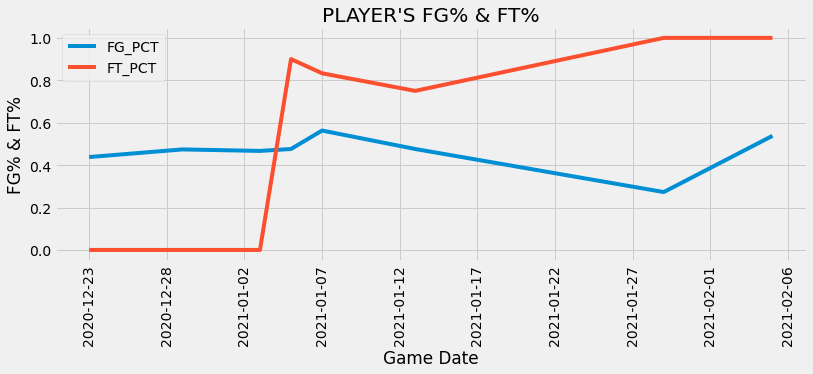

Marcus Smart


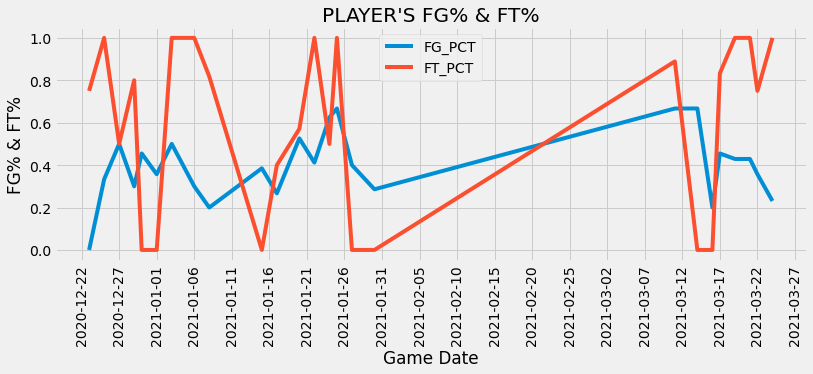

Tobias Harris


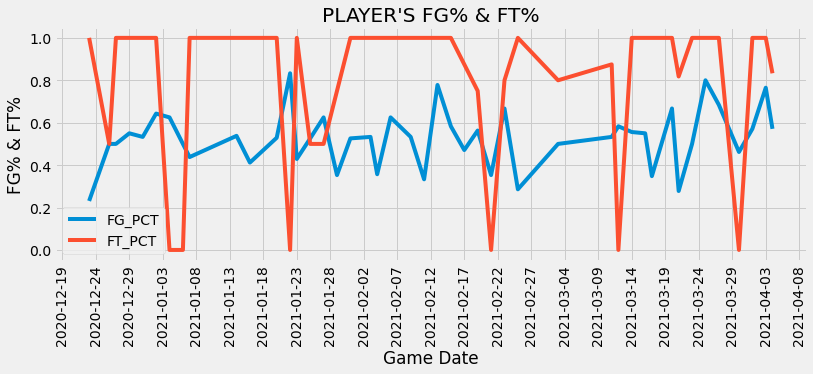

Bam Adebayo


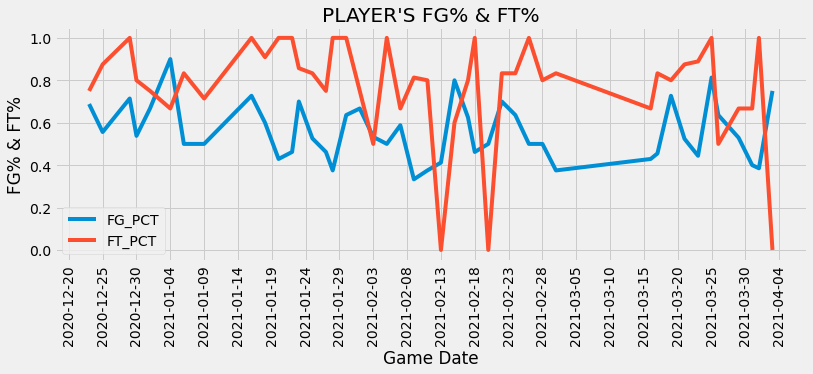

Jusuf Nurkic


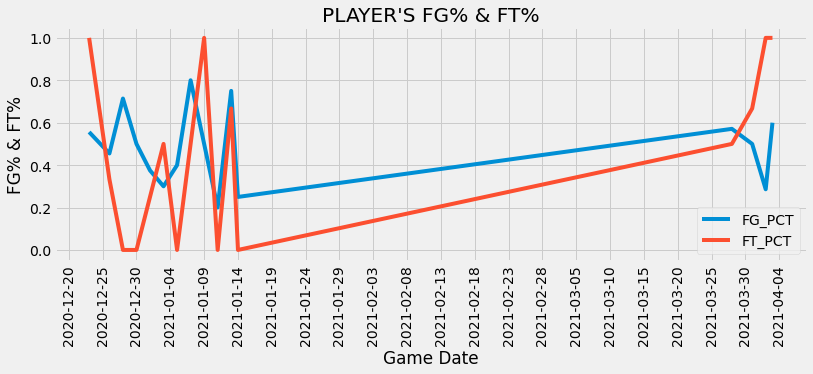

Daniel Theis


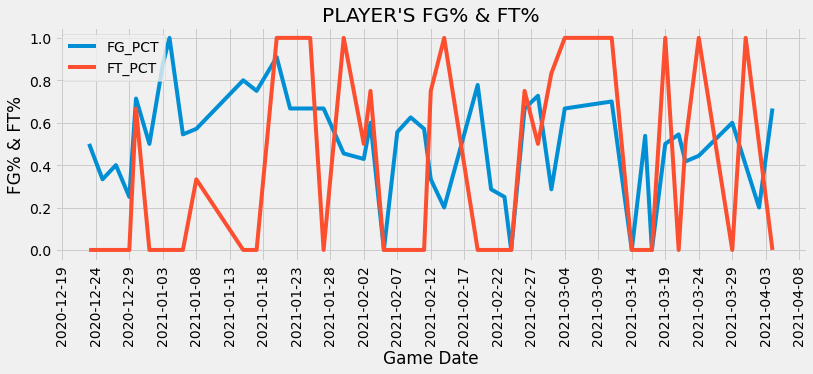

Will Barton


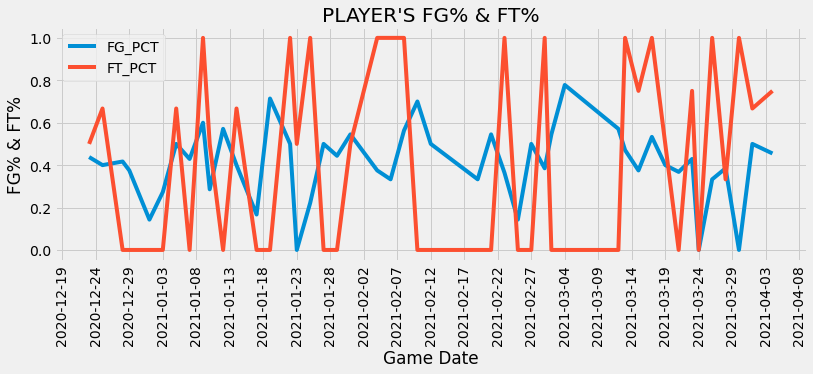

Cam Reddish


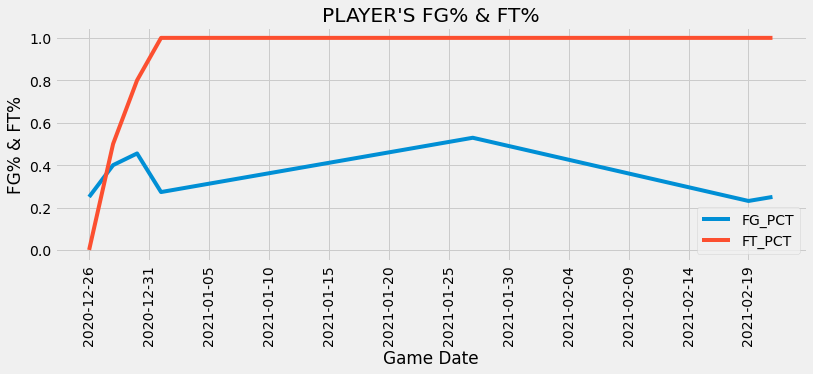

Hamidou Diallo


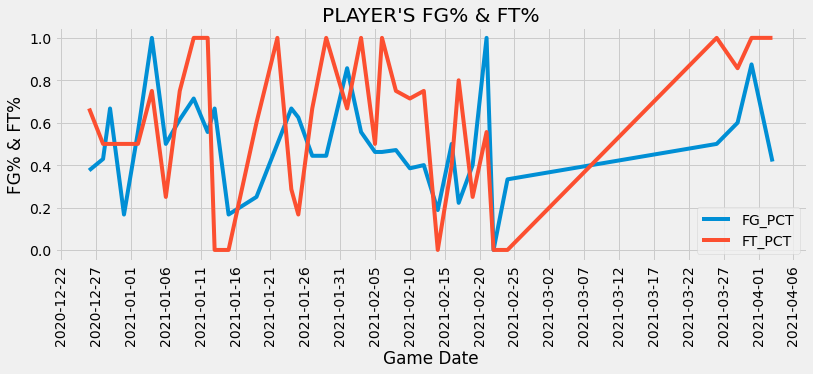

Wayne Ellington


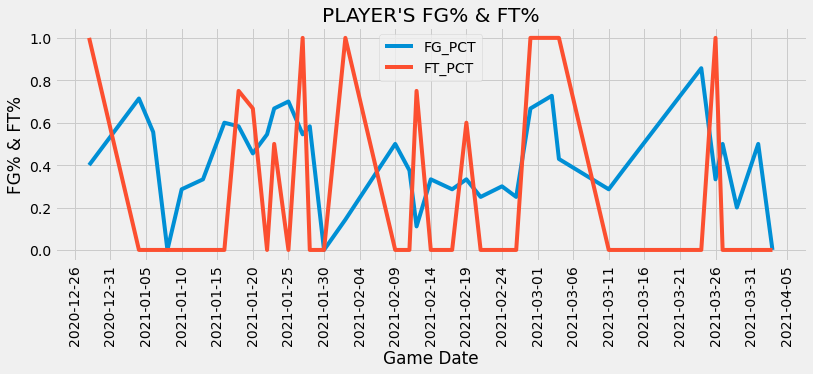

Jeff Green


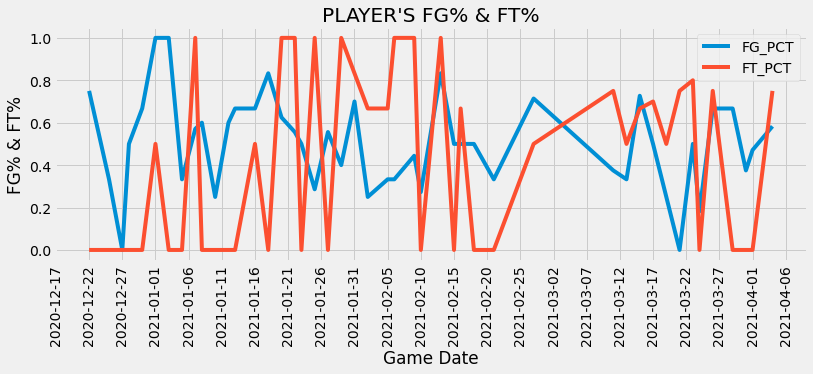

Ivica Zubac


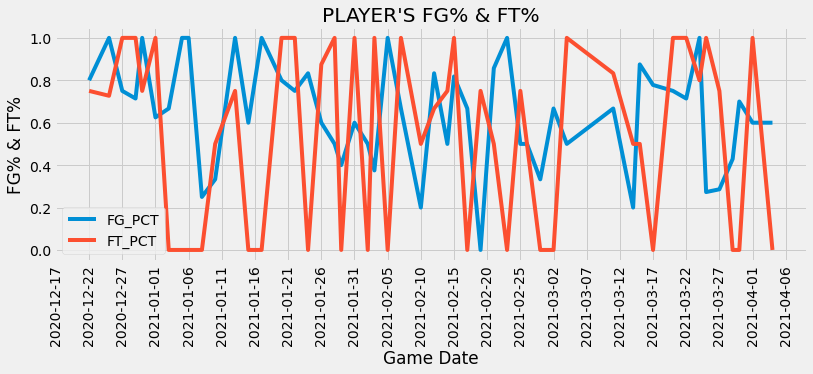

Delon Wright


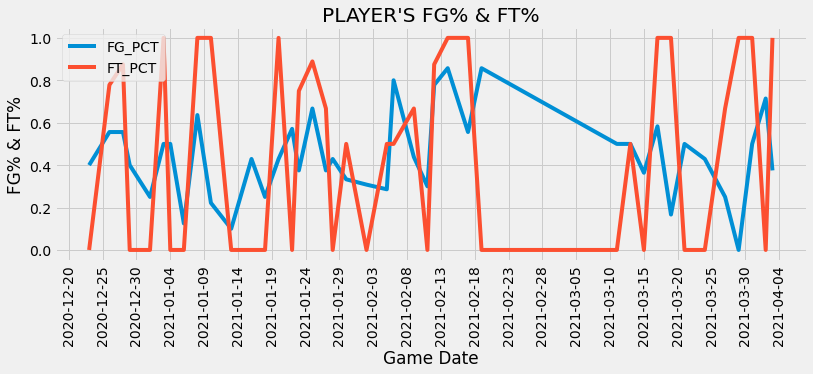

Dillon Brooks


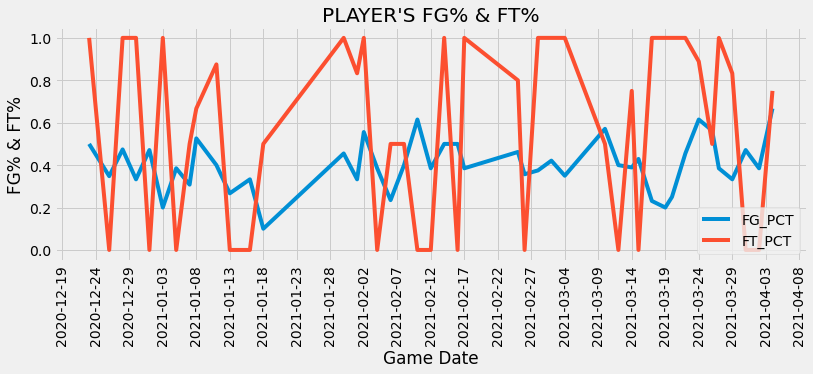

In [56]:
for i in players:
    print(i)
    plt.figure(figsize=(12,4))
    ax1 = sns.lineplot(x='MATCHUP_DATE', y='FG_PCT', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    ax2 = sns.lineplot(x='MATCHUP_DATE', y='FT_PCT', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    plt.title('PLAYER\'S FG% & FT%')
    plt.xlabel('Game Date')
    plt.ylabel('FG% & FT%')
    plt.xticks(rotation=90)
    plt.legend(['FG_PCT', 'FT_PCT'], loc='best')
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax2.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    plt.show()
#FG% and FT% trends of my players

Damian Lillard


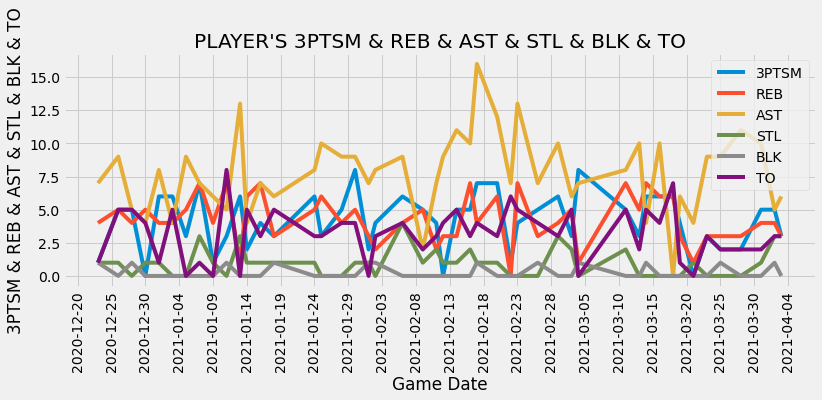

D'Angelo Russell


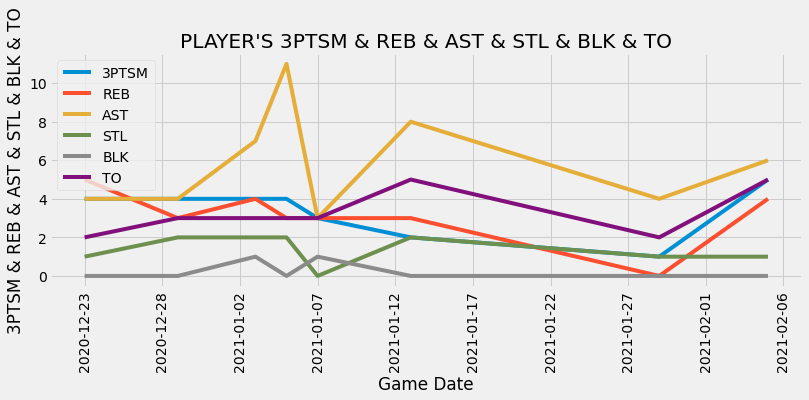

Marcus Smart


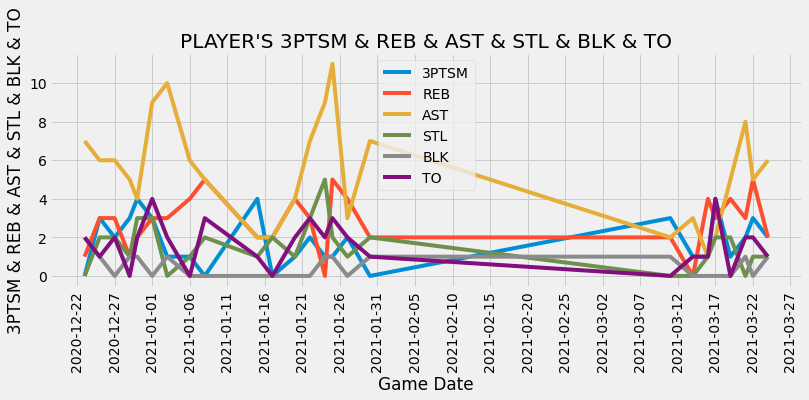

Tobias Harris


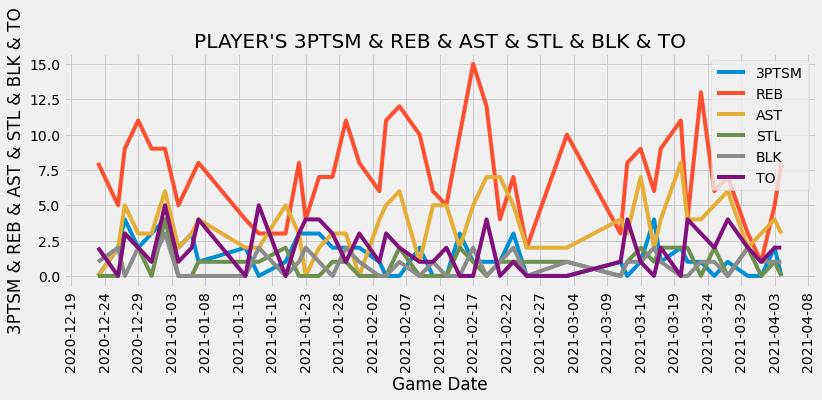

Bam Adebayo


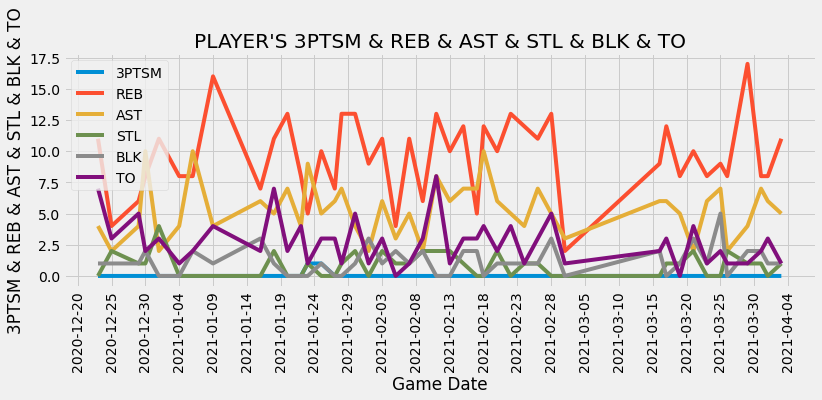

Jusuf Nurkic


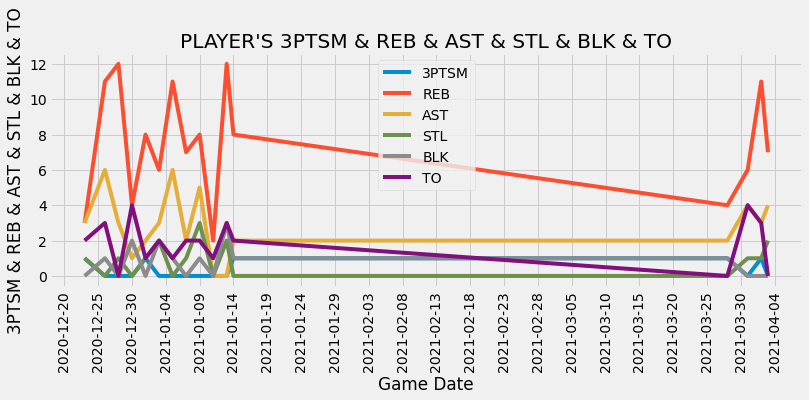

Daniel Theis


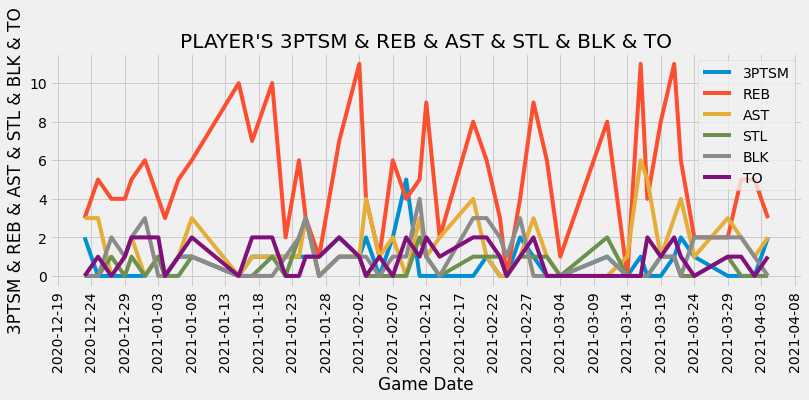

Will Barton


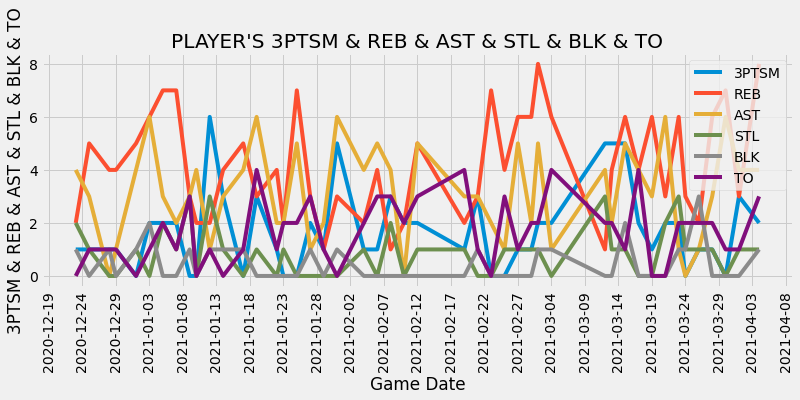

Cam Reddish


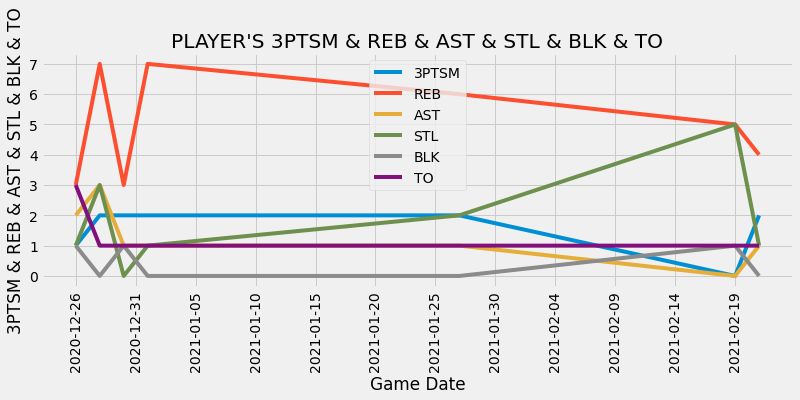

Hamidou Diallo


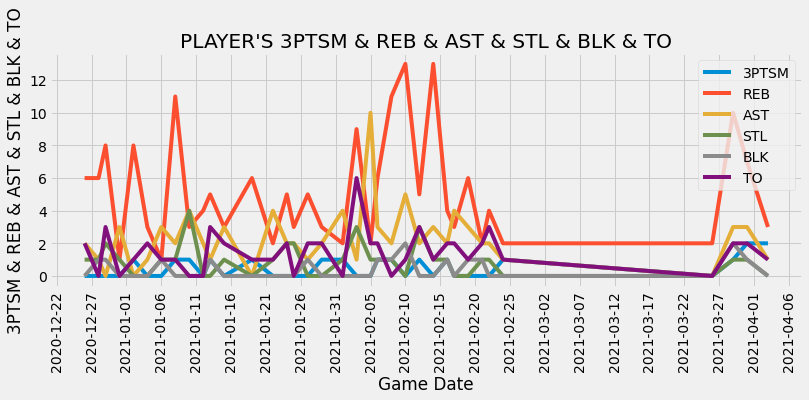

Wayne Ellington


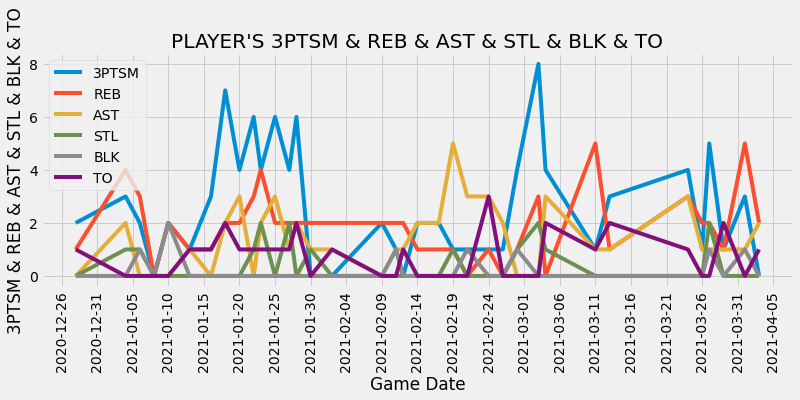

Jeff Green


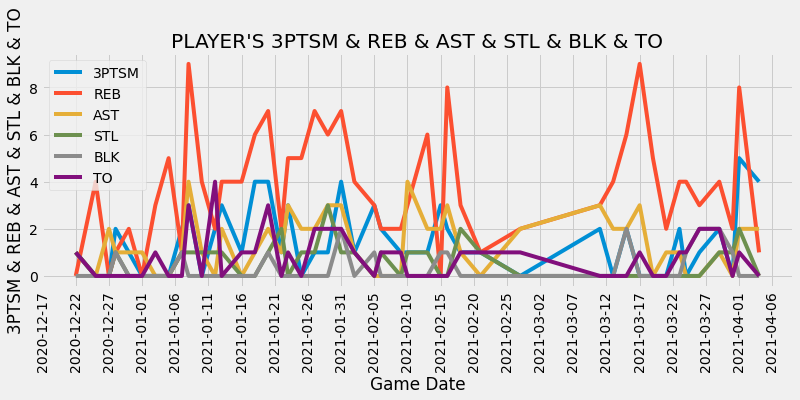

Ivica Zubac


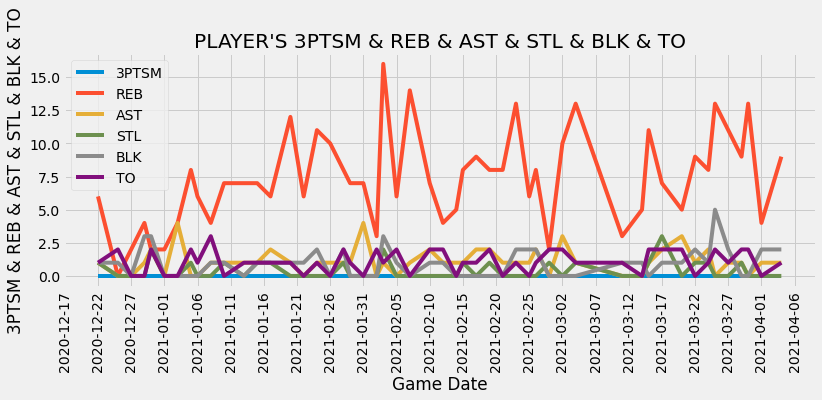

Delon Wright


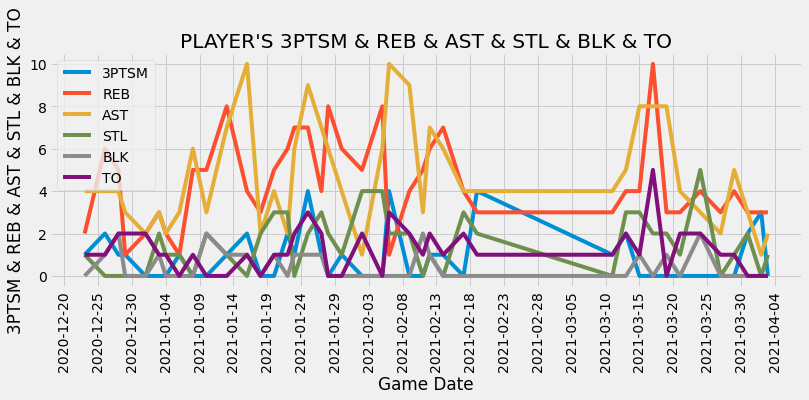

Dillon Brooks


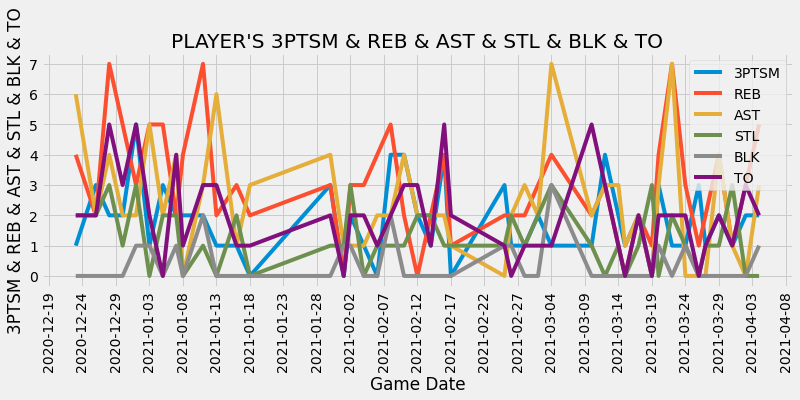

In [57]:
for i in players:
    print(i)
    plt.figure(figsize=(12,4))
    ax1 = sns.lineplot(x='MATCHUP_DATE', y='FG3M', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    ax2 = sns.lineplot(x='MATCHUP_DATE', y='REB', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    ax3 = sns.lineplot(x='MATCHUP_DATE', y='AST', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    ax4 = sns.lineplot(x='MATCHUP_DATE', y='STL', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    ax5 = sns.lineplot(x='MATCHUP_DATE', y='BLK', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    ax6 = sns.lineplot(x='MATCHUP_DATE', y='TO', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    plt.title('PLAYER\'S 3PTSM & REB & AST & STL & BLK & TO')
    plt.xlabel('Game Date')
    plt.ylabel('3PTSM & REB & AST & STL & BLK & TO')
    plt.xticks(rotation=90)
    plt.legend(['3PTSM', 'REB', 'AST', 'STL', 'BLK', 'TO'], loc='best')
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax2.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax3.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax4.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax5.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax6.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    plt.show()
#3PTSM, REB, AST, STL, BLK, TO trends of my players

###Finding a player's stats in regular season

In [58]:
player = 'Dillon Brooks'
player_id = find_players_by_full_name(player)[0]['id']
player_cumestats = CumeStatsPlayerGames(player_id=player_id)
player_cumestats_df = player_cumestats.get_data_frames()[0]

player_cumestats_df['DATE'] = '-'
player_cumestats_df['HOME'] = '-'
player_cumestats_df['AWAY'] = '-'
for i in range(0, len(player_cumestats_df.MATCHUP)):
    player_cumestats_df['DATE'][i] = player_cumestats_df.MATCHUP.str.split(' ')[i][0]
    player_cumestats_df['HOME'][i] = player_cumestats_df.MATCHUP.str.split(' ')[i][3]
    player_cumestats_df['AWAY'][i] = player_cumestats_df.MATCHUP.str.split(' ')[i][1]
    
player_cumestats_df['DATE'] = pd.to_datetime(player_cumestats_df['DATE'])
player_cumestats_df = player_cumestats_df.drop('MATCHUP', axis=1)

player_boxscore_df = []
for ids in player_cumestats_df.GAME_ID.values:
    df = BoxScoreTraditionalV2(ids).get_data_frames()[0]
    player_boxscore_df.append(df)
player_boxscore_df = pd.concat(player_boxscore_df)

player_boxscore_df = player_boxscore_df.loc[player_boxscore_df['PLAYER_ID'] == player_id]

final_df = pd.merge(player_boxscore_df, player_cumestats_df, how='inner', on='GAME_ID')
final_df = final_df.sort_values(by='DATE')

time.sleep(2)

In [59]:
final_df

GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
43  0022000017  1610612763               MEM   Memphis    1628415   
42  0022000021  1610612763               MEM   Memphis    1628415   
41  0022000042  1610612763               MEM   Memphis    1628415   
40  0022000056  1610612763               MEM   Memphis    1628415   
39  0022000069  1610612763               MEM   Memphis    1628415   
38  0022000087  1610612763               MEM   Memphis    1628415   
37  0022000103  1610612763               MEM   Memphis    1628415   
36  0022000119  1610612763               MEM   Memphis    1628415   
35  0022000128  1610612763               MEM   Memphis    1628415   
34  0022000150  1610612763               MEM   Memphis    1628415   
33  0022000169  1610612763               MEM   Memphis    1628415   
32  0022000193  1610612763               MEM   Memphis    1628415   
31  0022000208  1610612763               MEM   Memphis    1628415   
30  0022000304  1610612763               MEM   Memphis    1628415   
29  0022000320  1610612763               MEM   Memphis    1628415   
28  0022000322  1610612763               MEM   Memphis    1628415   
27  0022000340  1610612763               MEM   Memphis    1628415   
26  0022000355  1610612763               MEM   Memphis    1628415   
25  0022000369  1610612763               MEM   Memphis    1628415   
24  0022000386  1610612763               MEM   Memphis    1628415   
23  0022000403  1610612763               MEM   Memphis    1628415   
22  0022000418  1610612763               MEM   Memphis    1628415   
21  0022000429  1610612763               MEM   Memphis    1628415   
20  0022000562  1610612763               MEM   Memphis    1628415   
19  0022000501  1610612763               MEM   Memphis    1628415   
18  0022000509  1610612763               MEM   Memphis    1628415   
17  0022000525  1610612763               MEM   Memphis    1628415   
16  0022000536  1610612763               MEM   Memphis    1628415   
15  0022000555  1610612763               MEM   Memphis    1628415   
14  0022000566  1610612763               MEM   Memphis    1628415   
13  0022000580  1610612763               MEM   Memphis    1628415   
12  0022000593  1610612763               MEM   Memphis    1628415   
11  0022000607  1610612763               MEM   Memphis    1628415   
10  0022000623  1610612763               MEM   Memphis    1628415   
9   0022000636  1610612763               MEM   Memphis    1628415   
8   0022000642  1610612763               MEM   Memphis    1628415   
7   0022000658  1610612763               MEM   Memphis    1628415   
6   0022000674  1610612763               MEM   Memphis    1628415   
5   0022000691  1610612763               MEM   Memphis    1628415   
4   0022000700  1610612763               MEM   Memphis    1628415   
3   0022000712  1610612763               MEM   Memphis    1628415   
2   0022000725  1610612763               MEM   Memphis    1628415   
1   0022000741  1610612763               MEM   Memphis    1628415   
0   0022000758  1610612763               MEM   Memphis    1628415   

      PLAYER_NAME START_POSITION COMMENT    MIN   FGM  ...  AST  STL  BLK  \
43  Dillon Brooks              F          33:13   7.0  ...  6.0  2.0  0.0   
42  Dillon Brooks              F          30:36   8.0  ...  2.0  2.0  0.0   
41  Dillon Brooks              F          35:17   9.0  ...  4.0  3.0  0.0   
40  Dillon Brooks              F          27:53   6.0  ...  2.0  1.0  0.0   
39  Dillon Brooks              G          28:12   8.0  ...  2.0  3.0  1.0   
38  Dillon Brooks              G          29:28   3.0  ...  5.0  0.0  1.0   
37  Dillon Brooks              G          29:14   5.0  ...  2.0  2.0  0.0   
36  Dillon Brooks              G          28:22   4.0  ...  4.0  2.0  1.0   
35  Dillon Brooks              G          27:59  10.0  ...  0.0  0.0  0.0   
34  Dillon Brooks              G          33:22   6.0  ...  3.0  1.0  2.0   
33  Dillon Brooks              G          27:37   4.0 

In [60]:
final_df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS',
       'DATE', 'HOME', 'AWAY'],
      dtype='object')

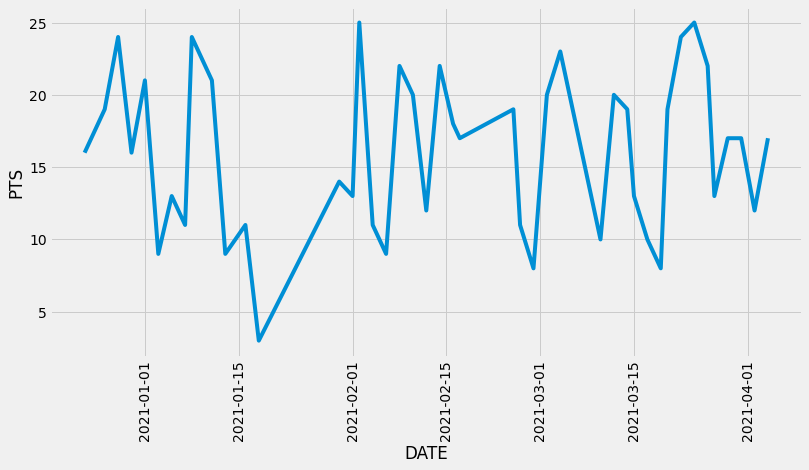

In [61]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='PTS', data=final_df)
plt.xticks(rotation=90)
plt.show()

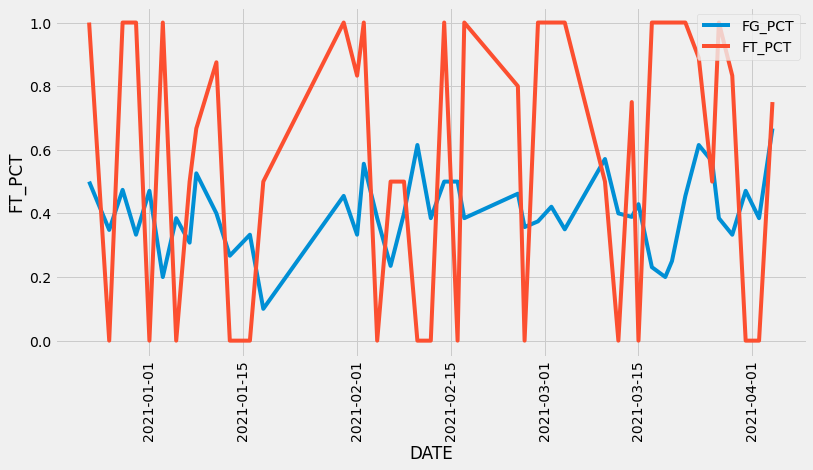

In [62]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='FG_PCT', data=final_df)
sns.lineplot(x='DATE', y='FT_PCT', data=final_df)
plt.xticks(rotation=90)
plt.legend(['FG_PCT', 'FT_PCT'], loc='best')
plt.show()

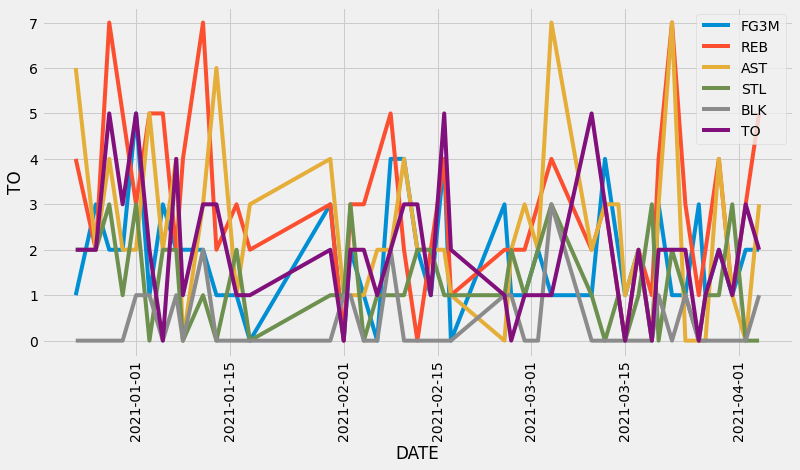

In [63]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='FG3M', data=final_df)
sns.lineplot(x='DATE', y='REB', data=final_df)
sns.lineplot(x='DATE', y='AST', data=final_df)
sns.lineplot(x='DATE', y='STL', data=final_df)
sns.lineplot(x='DATE', y='BLK', data=final_df)
sns.lineplot(x='DATE', y='TO', data=final_df)
plt.xticks(rotation=90)
plt.legend(['FG3M', 'REB', 'AST', 'STL', 'BLK', 'TO'], loc='best')
plt.show()